In [28]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=3)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 901, 1: 99})


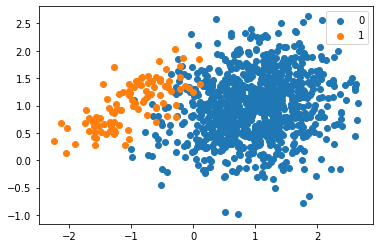

In [29]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [30]:
#!pip install imblearn

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [32]:
import imblearn
print(imblearn.__version__)

0.7.0


The class can be defined and takes a sampling_strategy argument that can be set to “minority” to automatically balance the minority class with majority class or classes.

In [35]:
oversample = RandomOverSampler(sampling_strategy='minority')

This means that if the majority class had 1,000 examples and the minority class had 100, this strategy would oversampling the minority class so that it has 1,000 examples.

In [40]:
# Alternative way
oversample = RandomOverSampler(sampling_strategy=0.5)

In [41]:
## Fit the data
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 901, 1: 450})


In [9]:
oversample = RandomOverSampler(sampling_strategy='minority')
## Fit the data
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 901, 1: 901})


# UnderSampling

In [42]:
from imblearn.under_sampling import RandomUnderSampler

In [43]:
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))

Counter({0: 9900, 1: 100})


In [46]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy=0.6)

In [47]:
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 166, 1: 100})


# Combine Both

In [48]:
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.9], flip_y=0, random_state=1)
# summarize class distribution
print(Counter(y)) # Counter({0: 9001, 1: 999})

# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.3)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y)) #Counter({0: 9001, 1: 2700})

# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y)) #Counter({0: 5400, 1: 2700})

Counter({0: 9001, 1: 999})
Counter({0: 9001, 1: 2700})
Counter({0: 5400, 1: 2700})


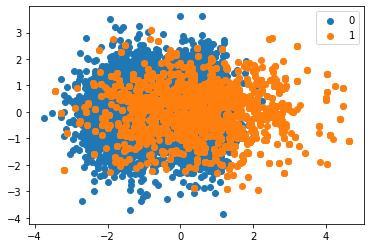

In [49]:
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# SMOTE

Counter({0: 9900, 1: 100})


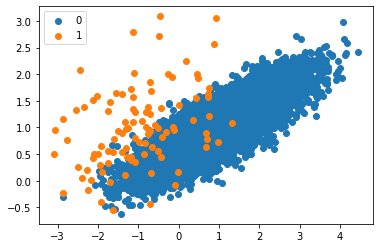

In [51]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

oversample the minority class using SMOTE and plot the transformed dataset.

In [50]:
from imblearn.over_sampling import SMOTE

In [52]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


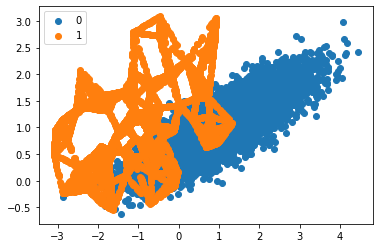

In [53]:
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

    We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000)
    Next we use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000)
    We would expect some SMOTE oversampling of the minority class, although not as much as before where the dataset was balanced. We also expect fewer examples in the majority class via random undersampling.

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


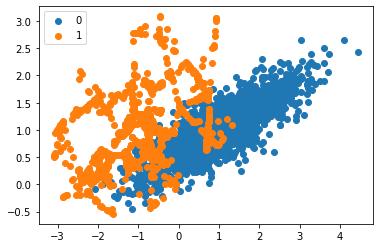

In [20]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Borderline-SMOTE

A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model.

We can then oversample just those difficult instances, providing more resolution only where it may be required

We can implement Borderline-SMOTE1 using the BorderlineSMOTE class from imbalanced-learn.

Instead of generating new synthetic examples for the minority class blindly, we would expect the Borderline-SMOTE method to only create synthetic examples along the decision boundary between the two classes.

In [21]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


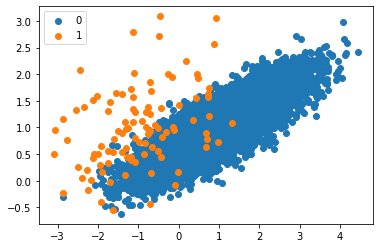

In [22]:
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [23]:
from imblearn.over_sampling import BorderlineSMOTE
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 9900})


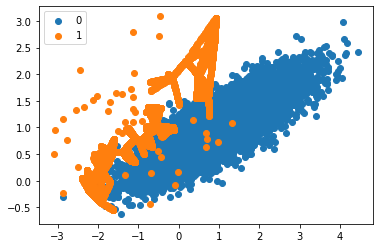

In [24]:
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Adaptive Synthetic Sampling (ADASYN)

Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class.

That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

ADASYN is based on the idea of **adaptively generating minority data samples according to their distributions**: more synthetic data is generated for minority class samples that are harder to learn compared to those minority samples that are easier to learn.

The key idea of ADASYN algorithm is to use a **density distribution** as a criterion to automatically decide the number of synthetic samples that need to be generated for each minority data example.

In [25]:
from imblearn.over_sampling import ADASYN

In [26]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


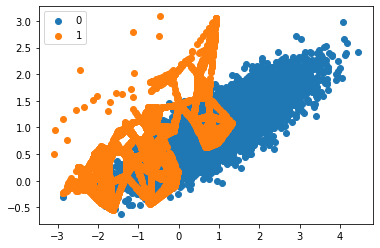

In [27]:
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()